<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [4]</a>'.</span>

In [1]:
import pandas as pd
import numpy as np
import random, time
import matplotlib.pyplot as plt

In [2]:
def norm(dataset):
    for column_index in range(dataset.shape[1] - 1):
        max_val = dataset[column_index].max()
        min_val = dataset[column_index].min()

        dataset[column_index] = (dataset[column_index] - min_val) / (max_val - min_val)

In [3]:
def predict(weights, inputs):
    # Ensure inputs is a 2D array with one row if it's a 1D array
    inputs = np.atleast_2d(inputs)
    bias = np.ones((inputs.shape[0], 1))
    inputs = np.hstack((inputs, bias))
    return 1 / (1 + np.exp(-np.dot(inputs, weights)))


# get accuracy, confusion matrices and rates
def train(dataset, split, error_threshold, alpha):
        
    #splitting into training and testing data
    group0 = dataset[dataset.iloc[:, 2] == 0]
    group1 = dataset[dataset.iloc[:, 2] == 1]
    sample_size = int(min(len(group0), len(group1)) * split)
    sampled_subset0 = group0.sample(n = sample_size, random_state = 42)
    sampled_subset1 = group1.sample(n = sample_size, random_state = 42)
    training = pd.concat([sampled_subset0, sampled_subset1])
    testing = dataset.drop(training.index)   
    
    
    
    #initialization stuff
    limit = 5000
    patterns = training.shape[0]
    w = [random.uniform(-0.5, 0.5) for _ in range(training.shape[1])]
    
    #matplotlib graphs
    plt.figure()

    # Plotting training data
    plt.scatter(training[training.iloc[:,2]==0].iloc[:,0], training[training.iloc[:,2]==0].iloc[:,1], label='Class 0 - Training', alpha=0.6)
    plt.scatter(training[training.iloc[:,2]==1].iloc[:,0], training[training.iloc[:,2]==1].iloc[:,1], label='Class 1 - Training', alpha=0.6)

    # Plotting testing data
    plt.scatter(testing[testing.iloc[:,2]==0].iloc[:,0], testing[testing.iloc[:,2]==0].iloc[:,1], label='Class 0 - Testing', alpha=0.6, marker='x')
    plt.scatter(testing[testing.iloc[:,2]==1].iloc[:,0], testing[testing.iloc[:,2]==1].iloc[:,1], label='Class 1 - Testing', alpha=0.6, marker='x')

    # Plotting decision boundary
    # For a 2D dataset, the decision boundary is a line: ax + by + c = 0 => y = (-c - ax) / b
    x = np.linspace(training.iloc[:,0].min(), training.iloc[:,0].max(), 400)
    y = (-w[2] - w[0]*x) / w[1]
    plt.plot(x, y, label='Decision Boundary')

    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data and Decision Boundary')
    plt.grid(True)
    plt.show()
    
    
    
    #training 
    i = 0
    error = patterns
    #while i is less than 5000 or it is not accurate enough
    while i < limit and error > error_threshold:
        #the error in this iteration of the neuron
        error = 0
        
        for row in range(patterns):
            x = training.iloc[row].values
            scaled_x = predict(w, x)
                
            #for total error sum[(out - desired)^2]. (-1)^2 = 1 and 1^2 = 1 so += 1 when they're different
            if x[2] != scaled_x:
                error += 1
                
            delta_weight = alpha * (x[2] - scaled_x)
            delta_weighted_x = x * delta_weight
            w = [random.uniform(-0.5, 0.5) for _ in range(training.shape[1])]
        i += 1
    
    print(i)
    print(f"Total error in training is: {error}")
    
    
    
    #testing
    true_positive = false_positive = true_negative = false_negative = 0
    for row in range(testing.shape[0]):
        x = testing.iloc[row].values
        predicted = predict(w, x)
        true = x[2]
        
        if predicted == 1 and true == 1:
            true_positive += 1
        elif predicted == 1 and true == 0:
            false_positive += 1
        elif predicted == 0 and true == 1:
            false_negative += 1
        else:
            true_negative += 1
    
    accuracy = (true_positive + true_negative) / testing.shape[0]
    true_positive_rate = true_positive / (true_positive + false_positive)
    false_positive_rate = false_positive / (true_positive + false_positive)
    true_negative_rate = true_negative / (true_negative + false_negative)
    false_negative_rate = false_negative / (true_negative + false_negative)
    
    print(f"true positive: {true_positive}\nrate: {true_positive_rate}\n\n")
    print(f"false positive: {false_positive}\nrate: {false_positive_rate}\n\n")
    print(f"true negative: {true_negative}\nrate: {true_negative_rate}\n\n")
    print(f"false negative: {false_negative}\nrate: {false_negative_rate}\n\n")
    print(f"accuracy: {accuracy}")

    return w

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

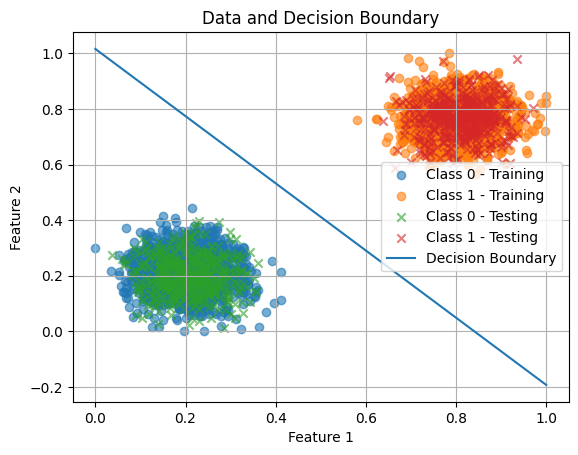

ValueError: shapes (1,4) and (3,) not aligned: 4 (dim 1) != 3 (dim 0)

In [4]:
#read the datasets
a = pd.read_csv("groupA.csv", header = None)
b = pd.read_csv("groupB.csv", header = None)
c = pd.read_csv("groupC.csv", header = None)



#convert to numeric
for col in a.columns:
    a[col] = a[col].apply(pd.to_numeric, errors = 'coerce')
    b[col] = b[col].apply(pd.to_numeric, errors = 'coerce')
    c[col] = c[col].apply(pd.to_numeric, errors = 'coerce')
    
    

#normalize the data
norm(a)
norm(b)
norm(c)








#soft activation
print(train(a, 3/4, 0.00001, 0.01))
print(train(a, 1/4, 0.00001, 0.01))

print(train(b, 3/4, 40, 0.01))
print(train(b, 1/4, 40, 0.01))

print(train(c, 3/4, 700, 0.01))
print(train(c, 1/4, 700, 0.01))





# #hard activation
# print(train(a, 3/4, 0.00001, 0.1))
# print(train(a, 1/4, 0.00001, 0.1))

# print(train(b, 3/4, 40, 0.1))
# print(train(b, 1/4, 40, 0.1))

# print(train(c, 3/4, 700, 0.1))
# print(train(c, 1/4, 700, 0.1))
